In [1]:
# name:weinanyu
# date:20220722
#  mag,gra,well

import numpy as np
import torch
from torch.utils.data import TensorDataset, random_split
def loaddata_func(path1,path2,path4,path5,path3,number):

    M_ori = np.load(path2)
    G_ori = np.load(path1)
    EM_ori = np.load(path4)
    WELL_ori = np.load(path5)
    Y_ori = np.load(path3)
    M_ori = M_ori[:200,:,:,:]
    G_ori = G_ori[:200,:,:,:]
    EM_ori = EM_ori[:200,:,:,:]
    WELL_ori = WELL_ori[:200,:,:]
    Y_ori = Y_ori[:200,:,:,:]

    train_M=M_ori.reshape([number,-1])
    train_M = train_M.reshape([number,1,10,10])
    train_G=G_ori.reshape([number,-1])
    train_G = train_G.reshape([number,1,20,20])
    train_EM=EM_ori.reshape([number,-1])
    train_EM = train_EM.reshape([number,2,10,5,8])


    train_WELL=WELL_ori.reshape([number,-1])
    train_WELL = train_WELL.reshape([number,2,20])

    train_Y=Y_ori.reshape([number,-1])
    train_Y = train_Y.reshape([number,8000])


    train_M=train_M.astype(np.float32)
    train_G=train_G.astype(np.float32)
    train_EM=train_EM.astype(np.float32)
    train_WELL=train_WELL.astype(np.float32)
    train_Y=train_Y.astype(np.float32)
    M = torch.from_numpy(train_M)
    G = torch.from_numpy(train_G)
    EM = torch.from_numpy(train_EM)
    WELL = torch.from_numpy(train_WELL)
    Y=torch.from_numpy(train_Y)
    
    # dataset_all=TensorDataset(M,G,EM,WELL,Y )

    # dataset_all=TensorDataset(M,G,EM,WELL,Y)
    dataset_all=TensorDataset(M,G,EM,WELL,Y)
    return dataset_all
def test_func(path1,path2,path4,path5,path3,number):

    M_ori = np.load(path2)
    G_ori = np.load(path1)
    EM_ori = np.load(path4)
    WELL_ori = np.load(path5)
    Y_ori = np.load(path3)
    M_ori = M_ori[:,:,:,:]
    G_ori = G_ori[:,:,:,:]
    EM_ori = EM_ori[:,:,:,:]
    WELL_ori = WELL_ori[:,:,:]
    Y_ori = Y_ori[:,:,:,:]

    train_M=M_ori.reshape([number,-1])
    train_M = train_M.reshape([number,1,10,10])
    train_G=G_ori.reshape([number,-1])
    train_G = train_G.reshape([number,1,20,20])
    train_EM=EM_ori.reshape([number,-1])
    train_EM = train_EM.reshape([number,2,10,5,8])


    train_WELL=WELL_ori.reshape([number,-1])
    train_WELL = train_WELL.reshape([number,2,20])

    train_Y=Y_ori.reshape([number,-1])
    train_Y = train_Y.reshape([number,8000])


    train_M=train_M.astype(np.float32)
    train_G=train_G.astype(np.float32)
    train_EM=train_EM.astype(np.float32)
    train_WELL=train_WELL.astype(np.float32)
    train_Y=train_Y.astype(np.float32)
    M = torch.from_numpy(train_M)
    G = torch.from_numpy(train_G)
    EM = torch.from_numpy(train_EM)
    WELL = torch.from_numpy(train_WELL)
    Y=torch.from_numpy(train_Y)
    
    # dataset_all=TensorDataset(M,G,EM,WELL,Y )

    # dataset_all=TensorDataset(M,G,EM,WELL,Y)
    dataset_all=TensorDataset(M,G,EM,WELL,Y)
    return dataset_all

def loaddata_func1(path1,path3,number):

    # M_ori = np.load(path2)
    G_ori = np.load(path1)
    Y_ori = np.load(path3)
    G_ori = G_ori[:1000,:,:,:]
    Y_ori = Y_ori[:1000,:,:,:]

    # train_M=M_ori.reshape([number,-1])
    # train_M = train_M.reshape([number,1,10,10])
    
    train_G=G_ori.reshape([number,-1])
    train_G = train_G.reshape([number,2,10,10])
    train_Y=Y_ori.reshape([number,-1])
    train_Y = train_Y.reshape([number,20,20,20])
    # train_M=train_M.astype(np.float32)
    train_G=train_G.astype(np.float32)
    train_Y=train_Y.astype(np.float32)
    # M = torch.from_numpy(train_M)
    G = torch.from_numpy(train_G)
    Y=torch.from_numpy(train_Y)
    
    dataset_all=TensorDataset(G,Y )
    # print(dataset_all.shape)
    return dataset_all

def shuffle_func(dataset,shuffle_ratio = 0.8):
    train_set_size = int(len(dataset) * shuffle_ratio)
    valid_set_size = len(dataset) - train_set_size
    train_set, valid_set = torch.utils.data.random_split(dataset, [train_set_size, valid_set_size])
    return train_set,valid_set

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv0(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=2, padding=2),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=2, padding=2),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down0(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            nn.Dropout(0.2),
            DoubleConv0(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up0(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_channels // 2, in_channels // 2, kernel_size=2, stride=1, padding=1)

        self.conv = DoubleConv0(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = torch.tensor([x2.size()[2] - x1.size()[2]])
        diffX = torch.tensor([x2.size()[3] - x1.size()[3]])

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv0(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv0, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels , kernel_size=3)
        
        # self.fc1 = nn.Linear(19200, 16000)
    def forward(self, x):
        # input_size = x.size(0)
        x = self.conv(x)

        return x



# %%
""" Full assembly of the parts to form the complete network """
"""Refer https://github.com/milesial/Pytorch-UNet/blob/master/unet/unet_model.py"""

import torch.nn.functional as F

class UNet0(nn.Module):
    def __init__(self, n_channels = 1, n_classes = 20, bilinear=False):
        super(UNet0, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv0(n_channels, 64)
        self.down1 = Down0(64, 128)
        self.down2 = Down0(128, 256)
        self.down3 = Down0(256, 512)
        self.down4 = Down0(512, 512)
        self.up1 = Up0(1024, 256, bilinear)
        self.up2 = Up0(512, 128, bilinear)
        self.up3 = Up0(256, 64, bilinear)
        self.up4 = Up0(128, 64, bilinear)
        self.outc = OutConv0(64, 20)
#         self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        out = logits.view(logits.size(0),-1)
#         out = self.relu(logits)
#         out = self.sigmoid(logits)
        # result = torch.as_tensor((out - 0.5) > 0, dtype=torch.int64) 
        return out
    
class DoubleConv1(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=2),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv1(x)


class Down1(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            nn.Dropout(0.2),
            DoubleConv1(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up1(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_channels // 2, in_channels // 2, kernel_size=3, stride=2, padding=1)

        self.conv = DoubleConv1(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = torch.tensor([x2.size()[2] - x1.size()[2]])
        diffX = torch.tensor([x2.size()[3] - x1.size()[3]])

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv1(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv1, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels , kernel_size=5)
        
        # self.fc1 = nn.Linear(19200, 16000)
    def forward(self, x):
        # input_size = x.size(0)
        x = self.conv(x)

        return x



# %%
""" Full assembly of the parts to form the complete network """
"""Refer https://github.com/milesial/Pytorch-UNet/blob/master/unet/unet_model.py"""

import torch.nn.functional as F

class UNet1(nn.Module):
    def __init__(self, n_channels = 1, n_classes = 20, bilinear=False):
        super(UNet1, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv1(n_channels, 64)
        self.down1 = Down1(64, 128)
        self.down2 = Down1(128, 256)
        self.down3 = Down1(256, 512)
        self.down4 = Down1(512, 512)
        self.up1 = Up1(1024, 256, bilinear)
        self.up2 = Up1(512, 128, bilinear)
        self.up3 = Up1(256, 64, bilinear)
        self.up4 = Up1(128, 64, bilinear)
        self.outc = OutConv1(64, 20)
#         self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        out = logits.view(logits.size(0),-1)
#         out = self.relu(logits)
#         out = self.sigmoid(logits)
        # result = torch.as_tensor((out - 0.5) > 0, dtype=torch.int64) 
        return out

class DoubleConv2(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        channels = out_channels // 2
        if in_channels > out_channels:
            channels = in_channels // 2
            
        self.double_conv2 = nn.Sequential(
            nn.Conv3d(in_channels, channels, kernel_size=(3,3,3), padding=2),
            nn.BatchNorm3d(channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(channels, out_channels, kernel_size=(3,3,3), padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv2(x)


class Down2(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool3d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            DoubleConv2(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up2(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up1 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up1 = nn.ConvTranspose3d(in_channels , in_channels // 2, kernel_size=2, stride=2, padding=1)

        self.conv = DoubleConv2(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up1(x1)
        # input is CHW
        diffZ = torch.tensor([x2.size()[2] - x1.size()[2]])
        diffY = torch.tensor([x2.size()[3] - x1.size()[3]])
        diffX = torch.tensor([x2.size()[4] - x1.size()[4]])
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2,
                        diffZ // 2, diffZ - diffZ // 2])
        # x1(256,512,5,4,4) x2(5,4,4)

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv2(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv2, self).__init__()
        self.conv = nn.Conv3d(in_channels, out_channels , kernel_size=(5,5,5))
        
        # self.fc1 = nn.Linear(19200, 16000)
    def forward(self, x):
        # input_size = x.size(0)
        x = self.conv(x)

        return x

class UNet2(nn.Module):   ### AMT channel
    def __init__(self, n_channels = 2, n_classes = 20, bilinear=False):
        super(UNet2, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv2(n_channels, 64)
        self.down1 = Down2(64, 128)
        self.down2 = Down2(128, 256)
        self.down3 = Down2(256, 512)
#         self.down4 = Down2(512, 512)
        self.up1 = Up2(512, 256, bilinear=0)
        self.up2 = Up2(256, 128, bilinear=0)
        self.up3 = Up2(128, 64, bilinear=0)
        self.outc = OutConv2(64, 20)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x1 = self.inc(x)       # x(2,5,8,10)  (64,7,10,12)
        x2 = self.down1(x1)    #(128,5,7,8)
        x3 = self.down2(x2)    #(256,4,5,6)
        x4 = self.down3(x3)    #(512,4,4,5)
#         x5 = self.down4(x4)    #(1028,4,4,4)
        x = self.up1(x4, x3)   #(512,6,7,8)
        x = self.up2(x, x2)    #(128,7,9,10)
        x = self.up3(x, x1)    #(64,9,12,14)
#         x = self.up4(x, x1)    #(64,14,9,12)
        logits = self.outc(x)  #(256,20,5,8,10)
        out = logits.view(logits.size(0),-1)   #(256,8000)
        # out = self.sigmoid(logits)
        # result = torch.as_tensor((out - 0.5) > 0, dtype=torch.int64) 
        return out


class DoubleConv3(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=2),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down3(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool1d(2),
            nn.Dropout(0.2),
            DoubleConv3(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up3(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up3 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up3 = nn.ConvTranspose1d(in_channels // 2, in_channels // 2, kernel_size=3, stride=2, padding=1)

        self.conv = DoubleConv3(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up3(x1) #(256,11) #(256,8)

        diff = torch.tensor([x2.size()[2] - x1.size()[2]])
        x1 = F.pad(x1, [diff // 2, diff - diff // 2])
        # diffX = torch.tensor([x2.size()[3] - x1.size()[3]])

        

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv3(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv3, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels , kernel_size=5)
        
        # self.fc1 = nn.Linear(19200, 16000)
    def forward(self, x):
        # input_size = x.size(0)
        x = self.conv(x)

        return x

class UNet3(nn.Module):
    def __init__(self, n_channels = 2, n_classes = 400, bilinear=False):
        super(UNet3, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv3(n_channels, 64)
        self.down1 = Down3(64, 128)
        self.down2 = Down3(128, 256)
        self.down3 = Down3(256, 512)
        self.down4 = Down3(512, 512)
        self.up1 = Up3(1024, 256, bilinear=0)
        self.up2 = Up3(512, 128, bilinear=0)
        self.up3 = Up3(256, 64, bilinear=0)
        self.up4 = Up3(128, 64, bilinear=0)
        self.outc = OutConv3(64, n_classes)
        self.sigmoid = nn.Sigmoid()
        


    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        out = logits.view(logits.size(0),-1)   #(256,8000)
        # out = self.sigmoid(logits)
        # result = torch.as_tensor((out - 0.5) > 0, dtype=torch.int64) 
        return out       

    
class Unet1(nn.Module):
    def __init__(self):
        super(Unet1, self).__init__()
        self.unet0 = UNet0()
        self.unet1 = UNet1()
        self.unet2 = UNet2()
        self.unet3 = UNet3()
        self.sigmoid = nn.Sigmoid()

         
    # def forward(self, x0, x1):
    def forward(self, x0,x1,x2,x3):
        y0 = self.unet0(x0)
        y1 = self.unet1(x1)
        y2 = self.unet2(x2)
        y3 = self.unet3(x3)

        out0 = self.sigmoid(y0)     #mag(256,8000)
        out1 = self.sigmoid(y1)     #gra(256,8000)
        out2 = self.sigmoid(y2)     #amt(256,8000)
        out3 = self.sigmoid(y3)     #well(256,8000)
        
        result = 1/4*(out0+out1+out2+out3) #########(32,8000)
#         out = result.view([32,20,20,20])   #(256,20,20,20)
        # result = torch.as_tensor((out - 0.5) > 0, dtype=torch.int64)
        return result
       


if __name__ == '__main__':
    net1 = Unet1()
#     print(net1)

In [3]:
from torch import optim
import torch.nn as nn
import torch
# import matplotlib.pyplot as plt
def valid(model,device,loader):
    model.eval()

    criterion = nn.BCEWithLogitsLoss()
#     criterion = nn.MSELoss()
    correct = 0
    total = len(loader.dataset)
    for x,x1,x2,x3,y in loader:
        x,y = x.to(device),y.to(device)
        x1 = x1.to(device)
        x2 = x2.to(device)
        x3 = x3.to(device)
        with torch.no_grad():
            pred = model(x,x1,x2,x3) 
            loss = criterion(pred,y)
            print('test loss:',loss)

    return loss

In [4]:
from torch import optim
import torch.nn as nn
import torch
import os
# import matplotlib.pyplot as plt
# from earlyval import *
from tensorboardX import SummaryWriter
import datetime
nowtime = datetime.datetime.now().strftime('%Y%m%d_%H_%M_%S')
print(nowtime + '\n')
pwd = os.getcwd()+'/' + 'log/' + nowtime
isExists = os.path.exists(pwd)
if not isExists:
    os.makedirs(pwd)
writer = SummaryWriter(pwd)


def train_net(net, device, dataloader1, dataloader3,dataloader5,epochs, batch_size, lr):
    # 加载训练集
   
    # 定义RMSprop算法
    optimizer = optim.RMSprop(net.parameters(), lr=lr, weight_decay=1e-8, momentum=0.9)
#     optimizer = optim.Adam(net.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
#     optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)
    # 定义Loss算法
    criterion = nn.BCEWithLogitsLoss()
#     criterion = nn.MSELoss()
    # best_loss统计，初始化为正无穷
    best_loss = float('inf')
    # 训练epochs次
    for epoch in range(epochs):
        # 训练模式
        net.train()
        # 按照batch_size开始训练
#         for image, label in train_loader:
        for (i, (image0,image1,image2,image3, label)) in enumerate(dataloader1):
            optimizer.zero_grad()
            # 将数据拷贝到device中
            image0 = image0.to(device=device, dtype=torch.float32)
            image1 = image1.to(device=device, dtype=torch.float32)
            image2 = image2.to(device=device, dtype=torch.float32)
            image3 = image3.to(device=device, dtype=torch.float32)
            label = label.to(device=device, dtype=torch.float32)
            # 使用网络参数，输出预测结果
            pred0 = net(image0,image1,image2,image3)
            # pred1 = net(image1)

            result0 = torch.as_tensor((pred0 - 0.5) > 0, dtype=torch.int64) 
            # result1 = torch.as_tensor((pred1 - 0.5) > 0, dtype=torch.int64) 
#             result = pred0.detach().numpy()
#             label_ = label.numpy()

            loss0 = criterion(pred0, label)
#             loss1 = criterion(pred1, label1)
            loss = loss0
            niter = epoch*len(dataloader1)+i
            if niter % 2 == 0:
                val_acc = valid(net,device,dataloader3)
                # print('val acc :', val_acc)
                
                writer.add_scalar('Val loss',val_acc,niter)
                writer.add_scalar('Train loss',loss,niter)
                writer.add_graph(net,(image0,image1,image2,image3,))
                writer.flush()
                test_acc = valid(net,device,dataloader5)
                writer.add_scalar('Test loss',test_acc,niter)
                writer.flush()
            print('Loss/train', loss.item())

            # 保存loss值最小的网络参数
            if loss < best_loss:
                best_loss = loss
                torch.save(net.state_dict(), 'best_model90.pth')
            # 更新参数
            loss.backward()
            optimizer.step()
        print('epoch: {} '.format(epoch))
    # print('val acc :', val_acc)
    


20230307_13_50_03



In [5]:
# %%
# name:weinanyu
# date:20220316
# early fusion

# %%
import os
import torch
from torch.utils.data import TensorDataset, random_split
os.getcwd()
os.chdir
import numpy as np
# import DataFunc

# from model import *
path_G = '/home/weinanyu/try/data23/new25/g.npy'
path_M = '/home/weinanyu/try/data23/new25/m.npy'
path_EM = '/home/weinanyu/try/data23/new25/EM2.npy'
path_WELL = '/home/weinanyu/try/data23/new25/well.npy'
# path_G = '/home/weinanyu/try/data3/alldata_g.npy'
# path_M = '/home/weinanyu/try/data3/alldata_m.npy'
path_Y = '/home/weinanyu/try/data23/new25/y.npy'
# path_G = '/home/weinanyu/try/data18/new1/g.npy'
# path_M = '/home/weinanyu/try/data18/new1/m.npy'
# path_EM = '/home/weinanyu/try/data18/new1/EM2.npy'
# path_WELL = '/home/weinanyu/try/data18/new1/well.npy'
# # # path_G = '/home/weinanyu/try/data3/alldata_g.npy'
# # # path_M = '/home/weinanyu/try/data3/alldata_m.npy'
# path_Y = '/home/weinanyu/try/data18/new1/y.npy'



# test_g = '/home/weinanyu/try/data23/new25/g.npy'
# test_m = '/home/weinanyu/try/data23/new25/m.npy'
# test_em = '/home/weinanyu/try/data23/new25/EM2.npy'
# test_well = '/home/weinanyu/try/data23/new25/well.npy'
# test_y = '/home/weinanyu/try/data23/new25/y.npy'
# test_g='/home/weinanyu/try/data21_test/new/g.npy'
# test_m='/home/weinanyu/try/data21_test/new/m.npy'
# test_em='/home/weinanyu/try/data21_test/new/EM2.npy'
# test_well='/home/weinanyu/try/data21_test/new/well.npy'
# test_y = '/home/weinanyu/try/data21_test/y.npy'
test_g='/home/weinanyu/try/data_test141/g.npy'
test_m='/home/weinanyu/try/data_test141/m.npy'
test_em='/home/weinanyu/try/data_test141/EM2.npy'
test_well='/home/weinanyu/try/data_test141/well.npy'
test_y = '/home/weinanyu/try/data_test141/y.npy'
dataset = loaddata_func(path_G,path_M,path_EM,path_WELL,path_Y,number =200)
train_set,valid_set = shuffle_func(dataset,shuffle_ratio = 0.9)
test_set = test_func(test_g,test_m,test_em,test_well,test_y,number = 1)
# test_set = test_func(path_G,path_M,path_EM,path_WELL,path_Y,number =7)
# %%
from torch.utils.data import DataLoader
batch_size = 32
dataloader1 = DataLoader(train_set, batch_size,shuffle=True) # 训练集
dataloader3 = DataLoader(valid_set, batch_size,shuffle=True) # 验证集
dataloader5 = DataLoader(test_set, batch_size,shuffle=True) # 测试集
# %%

net =  Unet1()
print(net)
# %%

if __name__ == "__main__":
    # 选择设备，有cuda用cuda，没有就用cpu
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     net.load_state_dict(torch.load('best_model77.pth'))
#     device = torch.device('cpu')
    net.to(device=device)
    
#     train_net(net, device, dataloader1, dataloader3,dataloader3,epochs=1500, batch_size = 128, lr=0.00001)

Unet1(
  (unet0): UNet0(
    (inc): DoubleConv0(
      (double_conv): Sequential(
        (0): Conv2d(1, 64, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down1): Down0(
      (maxpool_conv): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): Dropout(p=0.2, inplace=False)
        (2): DoubleConv0(
          (double_conv): Sequential(
            (0): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
            (3): Conv2d(128, 12

## OUT OF MEMORY

In [6]:
#pkill -u weinanyu


In [28]:
net.load_state_dict(torch.load('best_model84.pth'))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
net.to(device=device)
# train_net(net, device, dataloader1, dataloader3,dataloader3,epochs=400, batch_size = 256, lr=0.00001)

Unet1(
  (unet0): UNet0(
    (inc): DoubleConv0(
      (double_conv): Sequential(
        (0): Conv2d(1, 64, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down1): Down0(
      (maxpool_conv): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): Dropout(p=0.2, inplace=False)
        (2): DoubleConv0(
          (double_conv): Sequential(
            (0): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
            (3): Conv2d(128, 12

[0.40429043]
(1, 20, 20, 20)


/tmp/ipykernel_260695/4251269023.py:58: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
/tmp/ipykernel_260695/4251269023.py:59: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  diffY // 2, diffY - diffY // 2])
/tmp/ipykernel_260695/4251269023.py:176: UserWarning: __floordiv__ is deprecated, a

<IPython.core.display.Javascript object>


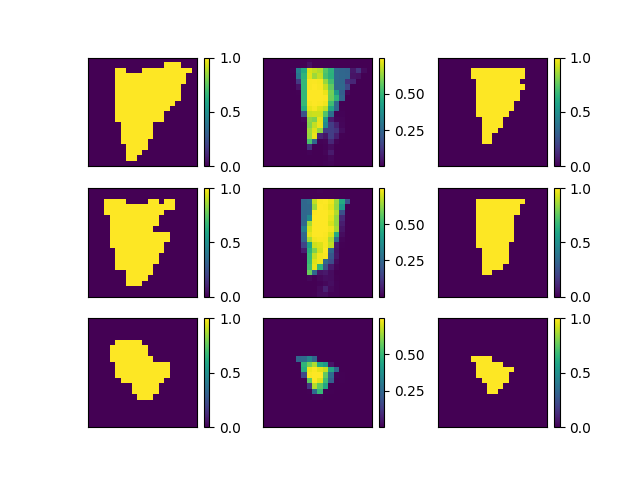

tensor([[0, 0, 0,  ..., 0, 0, 0]])


tensor([[2.0101e-05, 4.2223e-07, 1.4186e-07,  ..., 5.0057e-08, 7.1055e-07,
         4.6061e-05]])

In [29]:
device = torch.device('cpu')
%matplotlib notebook
import matplotlib.pyplot as plt
def plotpre(model,loader):
    criterion = nn.BCEWithLogitsLoss()
    correct = 0
    total = len(loader.dataset)
    for x,x1,x2,x3,y in loader:
        x,y = x.to(device),y.to(device)
        x1 = x1.to(device)
        x2 = x2.to(device)
        x3 = x3.to(device)
        with torch.no_grad():
            pred = model(x,x1,x2,x3) 
        pred0 = torch.as_tensor((pred - 0.15) > 0, dtype=torch.int64) 
        pred1 = pred.detach().numpy()
        pred00 = pred0.detach().numpy()
        
        y1 = y.numpy()
#         print(pred1.size)
        acc = iou(pred0, y)
        print(acc)
        pred01 = pred00.reshape(1,20,20,20)
        pred2 = pred1.reshape(1,20,20,20)
        y2 = y1.reshape(1,20,20,20)
        print(y2.shape)
        fig = plt.figure()
        
        ax1 = plt.subplot(3,3,1)   
        h1 = plt.imshow(np.transpose(y2[0,9,:,:]))
        c1 = plt.colorbar(h1)
        plt.xticks([])
        plt.yticks([])
        
        
        ax2 = plt.subplot(3,3,2) 
        h2 = plt.imshow(np.transpose(pred2[0,9,:,:]))
        plt.colorbar(h2)
        
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
        ax3 = plt.subplot(3,3,3) 
        h22 = plt.imshow(np.transpose(pred01[0,9,:,:]))
        plt.colorbar(h22)
        plt.show()
        plt.xticks([])
        plt.yticks([])
        
        
        
        
        ax4 = plt.subplot(3,3,4)   
        h3 = plt.imshow(np.transpose(y2[0,:,9,:]))
        c3 = plt.colorbar(h3)
        plt.xticks([])
        plt.yticks([])
        

        
        ax5 = plt.subplot(3,3,5) 
        h4 = plt.imshow(np.transpose(pred2[0,:,9,:]))
        plt.colorbar(h4)
        plt.show()
        plt.xticks([])
        plt.yticks([])
        
        ax6 = plt.subplot(3,3,6) 
        h44 = plt.imshow(np.transpose(pred01[0,:,9,:]))
        plt.colorbar(h44)
        plt.show()
        plt.xticks([])
        plt.yticks([])
        
        
        ax7 = plt.subplot(3,3,7)   
        h5 = plt.imshow(y2[0,:,:,9])
        c5 = plt.colorbar(h5)
        plt.xticks([])
        plt.yticks([])
        
        
        ax8 = plt.subplot(3,3,8) 
        h6 = plt.imshow(pred2[0,:,:,9])
        plt.colorbar(h6)
        plt.show()
        plt.xticks([])
        plt.yticks([])
        
        ax9 = plt.subplot(3,3,9) 
        h66 = plt.imshow(pred01[0,:,:,9])

        plt.colorbar(h66)
        plt.xticks([])
        plt.yticks([])
       
        
        plt.show()
        print(pred0)
        np.savetxt('/home/weinanyu/try/data25/si.txt',pred0)

        
    return pred
# plotpre(model,dataloader3)
plotpre(net,dataloader5)

In [ ]:
# plt.savefig("/home/weinanyu/try/new/fig/6.png") 
  
# plt.show()


In [145]:
import scipy.spatial as spt

256.0

## TEST


In [107]:
np.arange(0,20,10)
# np.shape(N)

array([ 0, 10])

In [54]:
device = torch.device('cpu')
%matplotlib notebook
import matplotlib.pyplot as plt
def plotpre(model,loader):
    criterion = nn.BCEWithLogitsLoss()
    correct = 0
    total = len(loader.dataset)
    for x,x1,x2,x3,y in loader:
        x,y = x.to(device),y.to(device)
        x1 = x1.to(device)
        x2 = x2.to(device)
        x3 = x3.to(device)
        with torch.no_grad():
            pred = model(x,x1,x2,x3) 
#         pred = torch.as_tensor((pred - 0.1) > 0, dtype=torch.int64) 
        
        pred1 = pred.detach().numpy()
        
        y1 = y.numpy()
        
#         print(pred1.size)
        pred2 = pred1.reshape(128,20,20,20)
        y2 = y1.reshape(128,20,20,20)
        
#         if os.path.exists('/'+'model'):
#             shutil.rmtree('/'+'model')
#         os.mkdir('/'+'Pred')
#         pred3=pred2[13,:,:,:]
#         pred3 = pred3.reshape(8000,1)
#         y3 = y2[13,:,:,:]
#         y3 = y3.reshape(8000,1)
#         os.chdir('/home/weinanyu/try/new/'+'Pred')
#         np.savetxt('pred2.txt',pred3,fmt = '%.1f')
#         np.savetxt('y2.txt',y3,fmt = '%.1f')
        print(y2.shape)
        fig = plt.figure()
        ax1 = plt.subplot(3,2,1)   
        h11 = pred2[13,8,:,:]
        h1 = plt.imshow(np.transpose(h11))

        c1 = plt.colorbar(h1)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')

        
        ax2 = plt.subplot(3,2,2) 
        h21 = y2[13,8,:,:]
        h2 = plt.imshow(np.transpose(h21))

#         h2 = plt.imshow(y2[13,10,:,:])
        plt.colorbar(h2)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
#         c2 = plt.colorbar(h2)
        
        ax3 = plt.subplot(3,2,3) 
        h31 = pred2[13,:,10,:]
        h3 = plt.imshow(h31)
#         h3 = plt.imshow(pred2[13,:,8,:])
        c3 = plt.colorbar(h3)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')

        
        ax4 = plt.subplot(3,2,4) 
        h41 = y2[13,:,10,:]
        h4 = plt.imshow(h41)
#         h4 = plt.imshow(y2[13,:,8,:])
        plt.colorbar(h4)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        
        ax5 = plt.subplot(3,2,5)   
        h5 = plt.imshow(pred2[13,:,:,8])
        c5 = plt.colorbar(h5)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')

        
        ax6 = plt.subplot(3,2,6) 
        h6 = plt.imshow(y2[13,:,:,8])
        plt.colorbar(h6)
        plt.show()
        
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        pred = torch.as_tensor((pred - 0.1) > 0, dtype=torch.int64) 
        acc = iou(pred, y)
#         acc = iou(pred, y)
        print(acc)



        
    return pred
# plotpre(model,dataloader3)
plotpre(net,dataloader1)

/tmp/ipykernel_66278/1224142143.py:58: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
/tmp/ipykernel_66278/1224142143.py:59: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  diffY // 2, diffY - diffY // 2])
/tmp/ipykernel_66278/1224142143.py:176: UserWarning: __floordiv__ is deprecated, and 

ValueError: cannot reshape array of size 2048000 into shape (128,20,20,20)

## iou

In [8]:
def iou(pred, target, n_classes = 2):
#n_classes ：the number of classes in your dataset
    ious = []
    pred = pred.view(-1)
    target = target.view(-1)

    # Ignore IoU for background class ("0")
    for cls in range(1, n_classes):  # This goes from 1:n_classes-1 -> class "0" is ignored
        pred_inds = pred == cls
        target_inds = target == cls
        intersection = (pred_inds[target_inds]).long().sum().item()  # Cast to long to prevent overflows
        union = pred_inds.long().sum().item() + target_inds.long().sum().item() - intersection
        if union == 0:
            ious.append(float('nan'))  # If there is no ground truth, do not include in evaluation
        else:
            ious.append(float(intersection) / float(max(union, 1)))
        return np.array(ious)